<a href="https://colab.research.google.com/github/TejasJoshi2005/Practical-DL-for-Coders/blob/main/1.%20Cats_vs_Dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -Uqq fastai
!pip install -Uqq fastbook

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 71.4 MB/s eta 0:00:00


In [ ]:
# 1. import fastai library
import fastbook
fastbook.setup_book()
from fastcore.all import *
from fastai.vision.all import *
from fastbook import*

Mounted at /content/gdrive


In [ ]:
# 2. define the path of the dataset

path = untar_data(URLs.PETS)/'images'

In [ ]:
# 3. define a function which returns the label of the images

def is_cat(x): return x[0].isupper()

# 4. define the dataloader
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224)
)

In [ ]:
# 5. Train the model and fine tune

learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

/usr/local/lib/python3.12/dist-packages/fastai/vision/learner.py:303: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")


Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


100%|██████████| 83.3M/83.3M [00:00<00:00, 182MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.179148,0.028723,0.008796,00:46


epoch,train_loss,valid_loss,error_rate,time
0,0.055696,0.016711,0.005413,00:42


In [ ]:
# 6. Upload a local image
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

In [ ]:
# 7. Use the uploaded image to predict on the model
img = PILImage.create(uploader.data[0])
is_cat,_,probs = learn.predict(img)
print(f"Is this a cat?: {is_cat}.")
print(f"Probability its a cat: {probs[1].item():.6f}")

Is this a cat?: False.
Probability its a cat: 0.000022


In [ ]:
# Segmentation:

path = untar_data(URLs.CAMVID_TINY)

dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str)
)

learn = unet_learner(dls, resnet34)
learn.fine_tune(8)

epoch,train_loss,valid_loss,time
0,3.467211,2.618243,00:01


epoch,train_loss,valid_loss,time
0,1.960137,1.581471,00:01
1,1.696159,1.196079,00:01
2,1.534993,1.233798,00:01
3,1.418805,1.003681,00:01
4,1.290419,0.874720,00:01
5,1.171429,0.765049,00:01
6,1.067252,0.704838,00:01
7,0.983531,0.703110,00:01


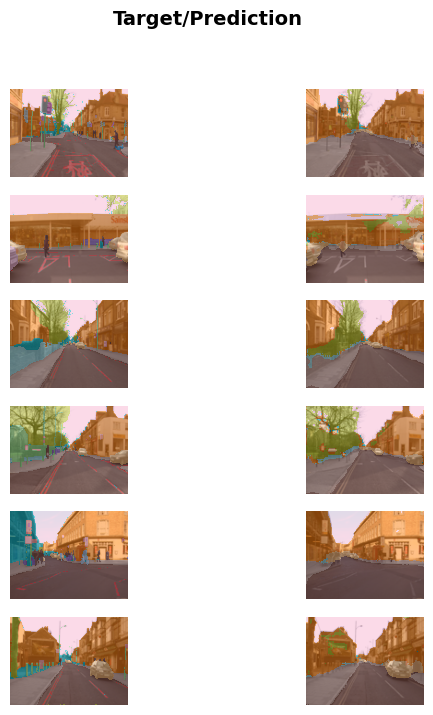

In [ ]:
learn.show_results(max_n = 6, figsize=(7,8))